## Softmax Regression

Softmax Regression is a generalized of logistic Regression that is used for multiclass classification

Example animal category: Cats, Dogs, Birds

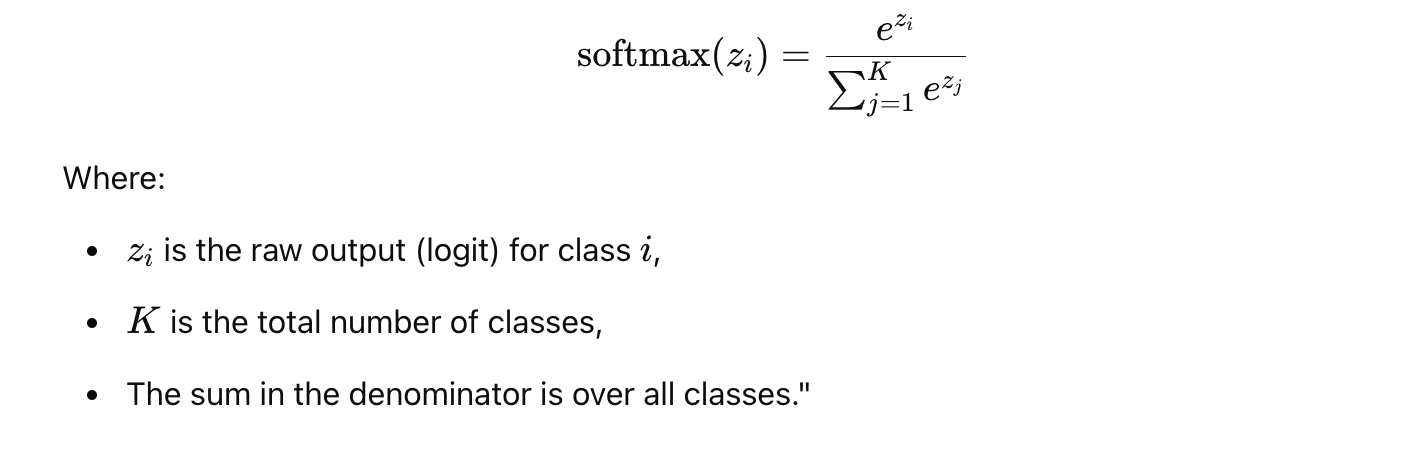

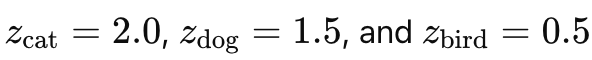

7.39+4.48+1.65=13.52

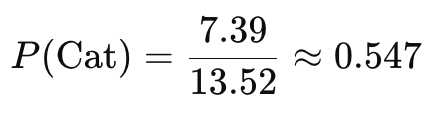

## code

In [1]:
import numpy as np

# Softmax function implementation

def softmax(logits):
    exp_logits = np.exp(logits) # Exponentiate the logits
    return exp_logits / np.sum(exp_logits, axis = 0) # Normalize to get probability

# Example logits
logits = np.array([2.,1.5,0.5])

In [2]:
# Get probabilities 
probabilities = softmax(logits)
probabilities

array([0.54654939, 0.33149896, 0.12195165])

In [6]:
# Cross Entropy Loss functions

def cross_entropy_loss(y_true, y_pred):
    # Clip thr predicted probabilities to avoid log(0)
    y_pred = np.clip(y_pred, 1e-10, 1-1e-10)
    return -np.sum(y_true * np.log(y_pred))/y_true.shape[0]

In [7]:
# Gradient Descent for the softmax Regression

def gradient_descent(X, y, learning_rate = 0.01, epochs = 100):
    m, n = X.shape # m is example and n is feature
    weights = np.random.randn(n, y.shape[1]) # Intialize weights
    biases = np.zeros((1, y.shape[1])) # Biases

    for epoch in range(epochs):
        logits = np.dot(X, weights) + biases # Compute logits
        probabilities = softmax(logits) # apply softmax

        # Compute the loss
        loss = cross_entropy_loss(y, probabilities)

        # Gradient computation (Softmax & Cross - Entropy derivative)
        gradient_w = np.dot(X.T, (probabilities - y))/m
        gradient_b = np.sum(probabilities -y, axis=0, keepdims=True)/m

        weights -= learning_rate*gradient_w
        biases -= learning_rate*gradient_b

        if epoch % 10 ==0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
    return weights, biases

In [8]:

# Example dataset: 4 samples, 2 features
X = np.array([[2.0, 3.0],
              [1.0, 1.5],
              [2.5, 3.5],
              [1.2, 1.0]])

# One-hot encoded labels for 3 classes
y = np.array([[1, 0, 0],  # Class 0
              [0, 1, 0],  # Class 1
              [0, 0, 1],  # Class 2
              [1, 0, 0]]) # Class 0


In [9]:
# Train the model
weights, biases = gradient_descent(X, y, learning_rate=0.1, epochs=50)

# Print the final weights and biases
print("Final weights:", weights)
print("Final biases:", biases)

Epoch 0, Loss: 2.8704
Epoch 10, Loss: 2.7374
Epoch 20, Loss: 2.7319
Epoch 30, Loss: 2.8124
Epoch 40, Loss: 2.9350
Final weights: [[ 2.23892932 -1.34031104 -0.78194403]
 [ 2.19754139 -0.04000799  1.37009763]]
Final biases: [[ 1.25000000e+00 -2.63677968e-17  4.16333634e-18]]
